# Gradient descent

## Implementation

In [1]:
#Octavio Andrick Sánchez Perusquia                                            A01378649
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
#Dummy

import pandas as pd

def normalizeX(arr):
    '''
    Normalizes a 2D array by column using min-max method
    
    Args:
        
        arr -> Array to br normalized
        
    Returns:
    
        A normalized 2D array
    '''
    data = pd.DataFrame(arr, index=None)
    print(data.shape)
    for i in range(data.shape[1]-1):
        data.iloc[:,i] = (data.iloc[:,i] - data.iloc[:,i].min())/(data.iloc[:,i].max() - data.iloc[:,i].min())
        
    return data.to_numpy()

def normalize(arr):
    '''
    Normalizes a 1D array using min-max method
    
    Args:
        
        arr -> Array to br normalized
        
    Returns:
    
        A normalized 1D array
    '''
    return (arr - arr.min())/(arr.max() - arr.min())

def setTest(D, N, max_X ,max_theta, max_noise):
    '''
    Initializes all parameters via random values that generates a close representation of a multivariate linear function
    
    Args:
    
        D -> Number of dimensions 
        N -> Number of samples
        max_X -> Maximum absolute value for an element in the domain space
        max_theta -> Maximum absolute value for a X(i) coefficient
        max_noise -> Maximum absolute value for a scalar that deviates the value of the dependent variable
        
    Returns:
    
        None
    
    '''
    global theta
    global X
    global Y
    global alpha
    global total_error
    
    theta = []
    X = []
    Y = []
    total_error = 0
    alpha = 0.1
    
    if D < 2:
        return
    
    for i in range(D):
        theta.append(random.uniform(-max_theta,max_theta))
        
    for i in range(N):
        entry = []
        for j in range(D-1):
            entry.append(random.uniform(-max_X,max_X))
            
        entry.append(1)
        X.append(entry)
        Y.append(np.dot(X[i],theta) + random.uniform(-max_noise,max_noise))
    
    theta = np.array(theta)
    X = normalizeX(np.array(X))
    Y = normalize(np.array(Y))
    
    print('Theta (not for normalized data): ' + str(theta))
    print('X: ' + str(X))
    print('Y: ' + str(Y))

In [3]:
def h(theta, x):
    '''
    Computes an evaluation of a linear function given a uni-dimensional or multi-dimensional point
    
    Args:
    
        theta -> Array of coefficients to be used per dimension
        x -> Vector representation of the point of evaluation
        
    Returns:
    
        An evaluation of h(x)
    '''
    return sum(theta * x)

In [4]:
def update(theta, j, X, Y):
    '''
    Computes the partial derivative of a point in the domain and adjusts the corresponding coefficient based on its value
    
    Args:
    
        theta -> Array of coefficients to be used per dimension
        j -> the current dimension corresponding to the coefficient to be updated
        X -> Array of points in the domain
        Y -> True values of evaluation for each point
        
    Returns:
    
        An updated value of theta
    '''
    global total_error
    acum = 0
    for i in range(len(X)):
        error = (h(theta, X[i]) - Y[i]) * X[i][j]
        acum += error
        total_error += error
        
    return theta[j] - (alpha/len(X)*acum)

In [5]:
def descent(theta, X, Y):
    '''
    Computes an iteration to update all the current values of theta simultaneously
    
    Args:
    
        theta -> Array of coefficients to be used per dimension
        X -> Array of points in the domain
        Y -> True values of evaluation for each point
        
    Returns:
    
        An array that contains an updated value for each previous theta
    '''
    T = []
    for j in range(len(theta)):
        T.append(update(theta, j, X, Y))
        
    return T

In [6]:
def GD(theta, X, Y):
    '''
    Updates an array of coefficients for a single iteration using regular Gradient Descent.
    Prints accumulated error per iteration
    
    Args:
    
        theta -> Array of coefficients to be used per dimension
        X -> Array of points in the domain
        Y -> True values of evaluation for each point
        N -> Number of iterations
        
    Returns:
    
        An array of coefficients given a number of iterations of GD
    '''
    global total_error
    
    total_error = 0
    theta = descent(theta, X, Y)
    print('Train Error: ' + str(total_error))
        
    return theta

## Dataset training

In [7]:
#DB to be used
import pandas as pd
auto = pd.read_csv('Automobile.csv', na_values = '?')
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,number-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


To decide a dependent variable to predict, we are going to pick one that holds a significant correlation (>0.7) with other atributes and choose them as independent variables. In this case, we will pick *wheel-base* as the dependent variable and *width*, *length* and *curb-weight* as independent variables.

<AxesSubplot:>

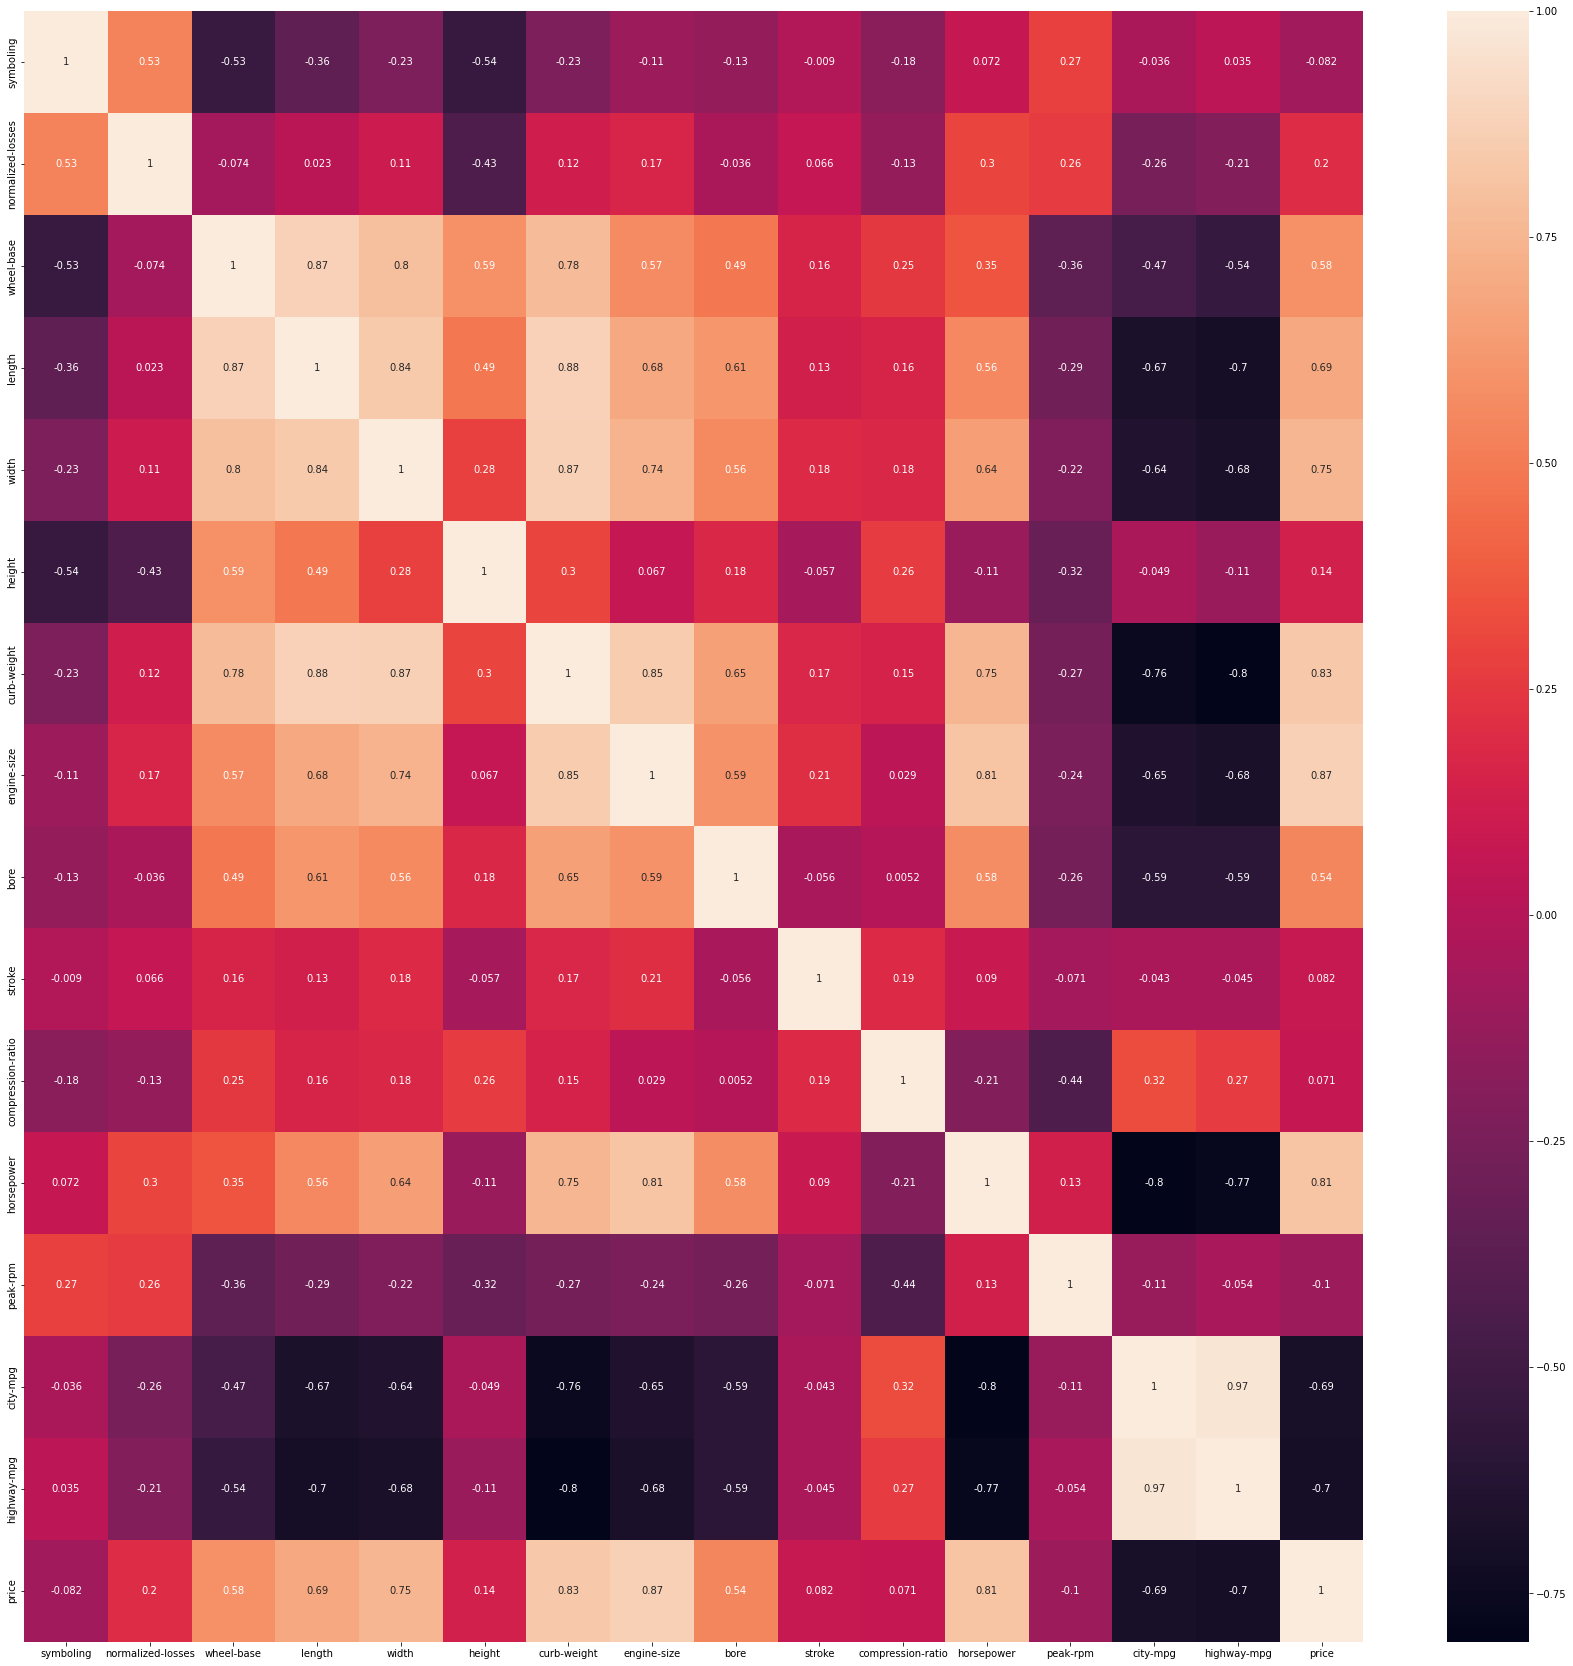

In [8]:
import seaborn as sns
plt.figure(figsize=(30,30))
sns.heatmap(auto.corr(), annot=True)

In [9]:
# Setting domain and range
X_auto = auto[['length','width','curb-weight']]
Y_auto = auto['wheel-base']
X_auto

,length,width,curb-weight
0,168.8,64.1,2548
1,168.8,64.1,2548
2,171.2,65.5,2823
3,176.6,66.2,2337
4,176.6,66.4,2824
...,...,...,...
200,188.8,68.9,2952
201,188.8,68.8,3049
202,188.8,68.9,3012
203,188.8,68.9,3217


In [10]:
from sklearn.model_selection import train_test_split

def setTrain(D, T, Xt, Yt, max_theta, state):
    '''
    Initializes all parameters via random values that generates a close representation of a multivariate linear function.
    Instantiates a normalized train and test set with a train size ratio of T
    
    Args:
    
        D -> Number of dimensions 
        T -> Proportion (percentage) of elements used for training
        Xt -> A bidimensional list with values that corresponds to the function domain
        Yt -> An uni-dimensional list that corresponds to the function range
        max_theta -> Maximum absolute value for a X(i) coefficient
        state -> Seed used for randomized entry selection for train and test sets
        
    Returns:
    
        None
    
    '''
    global theta
    global X
    global Y
    global Xtest
    global ytest
    global alpha
    global total_error
    
    theta = []
    X = []
    Y = []
    N = np.ceil(len(Xt) * T)
    total_error = 0
    alpha = 0.1
    
    Xtrain, Xtest, ytrain, ytest = train_test_split(Xt, Yt, train_size=T, random_state=state)
    
    if D < 2:
        return
    
    for i in range(D):
        theta.append(random.uniform(-max_theta,max_theta))
        
    for entry in Xtrain:
        entry.append(1)    
        X.append(entry)
        
    for i in range(len(Xtest)):
        Xtest[i].append(1)
        
    Y = ytrain
    
    theta = np.array(theta)
    X = normalizeX(np.array(X))
    Xtest = normalizeX(np.array(Xtest))
    Y = normalize(np.array(Y))
    ytest = normalize(np.array(ytest))
    
    print('Theta (not for normalized data): ' + str(theta))
    print('X: ' + str(X))
    print('Y: ' + str(Y))

We set the train and test sets using the values of X and Y picked before. In this case, *0.8* indicates that 80% of data will be included in the test and just 20% in the test set.

In [11]:
setTrain(4, 0.8, X_auto.values.tolist(), Y_auto.values.tolist(), 10, 2)

(164, 4)
(41, 4)
Theta (not for normalized data): [ 3.33856066  4.01725555  7.30040868 -4.20547631]
X: [[0.91338583 0.94285714 0.86145346 1.        ]
 [0.52913386 0.58095238 0.56948576 1.        ]
 [0.2        0.19047619 0.08712282 1.        ]
 [0.48818898 0.44761905 0.32596685 1.        ]
 [0.45511811 0.34285714 0.24521887 1.        ]
 [0.3496063  0.22857143 0.10072248 1.        ]
 [0.2        0.19047619 0.2239694  1.        ]
 [0.35748031 0.19047619 0.20314492 1.        ]
 [0.4976378  0.36190476 0.3561411  1.        ]
 [0.86614173 0.74285714 1.         1.        ]
 [0.38582677 0.4        0.24649384 1.        ]
 [0.43149606 0.34285714 0.18359541 1.        ]
 [0.43149606 0.34285714 0.20271993 1.        ]
 [0.69606299 0.67619048 0.57331067 1.        ]
 [0.85511811 0.62857143 0.64470888 1.        ]
 [0.68031496 0.44761905 0.61113472 1.        ]
 [0.53385827 0.58095238 0.60603485 1.        ]
 [0.47244094 0.26666667 0.34934127 1.        ]
 [0.48503937 0.32380952 0.31959201 1.        ]
 [0.

In [12]:
def run_test(epoch):
    '''
    Runs GD for a number of epochs, updating the set of coefficients and computing per-epoch testing error
    
    Args:
    
        epoch -> Number of iterations of Gradient Descent
        
    Returns:
    
        Final test error using the prediction given by the final values of the coefficients
    '''
    global Xtest
    global ytest
    global theta
    
    for i in range(epoch):
        print('Epoch ', i)
        theta = GD(theta,X,Y)
        
        accum = 0
        for j in range(len(Xtest)):
            accum += abs(h(theta, Xtest[j]) - ytest[j])
            
        print('Test total error: ', accum)
        
    
        
    print(theta)
    return accum

It is shown in the cell below the test and training error. We can see that both decrease as epoch size increases at a steady rate. Nonetheless, the train error remains significantly lower than the test counterpart. This can be mitigated with cross-validation methods by varying the sections of data selected as train and test.

In [13]:
run_test(10000)

Epoch  0
Train Error: 764.8750727865447
Test total error:  128.6008836609125
Epoch  1
Train Error: 659.3525023012875
Test total error:  121.14853917491656
Epoch  2
Train Error: 570.1741876396103
Test total error:  115.21757648286241
Epoch  3
Train Error: 494.7923578473633
Test total error:  110.11315540025899
Epoch  4
Train Error: 431.05652422742435
Test total error:  105.70717561293391
Epoch  5
Train Error: 377.15152976267984
Test total error:  102.0438873283265
Epoch  6
Train Error: 331.54525886814315
Test total error:  98.90716813820399
Epoch  7
Train Error: 292.9445010784306
Test total error:  96.16256189935915
Epoch  8
Train Error: 260.25769717797056
Test total error:  93.74970103098448
Epoch  9
Train Error: 232.56349455285343
Test total error:  91.61762519367802
Epoch  10
Train Error: 209.08420589713052
Test total error:  89.76253071572432
Epoch  11
Train Error: 189.16340666374245
Test total error:  88.14554687356508
Epoch  12
Train Error: 172.247025880495
Test total error:  86.6

Train Error: 30.513191727933282
Test total error:  32.32430744899523
Epoch  139
Train Error: 30.267765297348717
Test total error:  32.09872362411437
Epoch  140
Train Error: 30.024311091419868
Test total error:  31.874936937920065
Epoch  141
Train Error: 29.78281326229302
Test total error:  31.652932957523028
Epoch  142
Train Error: 29.54325608948474
Test total error:  31.432697366005534
Epoch  143
Train Error: 29.305623978854204
Test total error:  31.21421596148926
Epoch  144
Train Error: 29.06990146158377
Test total error:  30.997474656210734
Epoch  145
Train Error: 28.836073193170346
Test total error:  30.78245947560423
Epoch  146
Train Error: 28.604123952423194
Test total error:  30.56915655739199
Epoch  147
Train Error: 28.37403864047108
Test total error:  30.35755215068192
Epoch  148
Train Error: 28.14580227977781
Test total error:  30.14763261507238
Epoch  149
Train Error: 27.919400013165745
Test total error:  29.939384419764327
Epoch  150
Train Error: 27.69481710284758
Test tota

Train Error: 12.647013398930468
Test total error:  15.982238540404245
Epoch  248
Train Error: 12.545161977987412
Test total error:  15.892883254158336
Epoch  249
Train Error: 12.444129090610677
Test total error:  15.804228621721325
Epoch  250
Train Error: 12.343908159491901
Test total error:  15.716269021791643
Epoch  251
Train Error: 12.244492660174005
Test total error:  15.628998878232732
Epoch  252
Train Error: 12.145876120626664
Test total error:  15.542412659710111
Epoch  253
Train Error: 12.048052120824956
Test total error:  15.456504879331371
Epoch  254
Train Error: 11.951014292331607
Test total error:  15.371270094289075
Epoch  255
Train Error: 11.85475631788206
Test total error:  15.286702905506518
Epoch  256
Train Error: 11.7592719309737
Test total error:  15.202797957286354
Epoch  257
Train Error: 11.66455491545796
Test total error:  15.119549936961976
Epoch  258
Train Error: 11.570599105135377
Test total error:  15.036953574551823
Epoch  259
Train Error: 11.477398383354629


Train Error: 5.232877011396459
Test total error:  9.570219177910635
Epoch  357
Train Error: 5.1906134939798845
Test total error:  9.538739513076932
Epoch  358
Train Error: 5.148689690853083
Test total error:  9.507493537992131
Epoch  359
Train Error: 5.107102872217624
Test total error:  9.476479384485382
Epoch  360
Train Error: 5.065850330210001
Test total error:  9.445695199392524
Epoch  361
Train Error: 5.024929378725646
Test total error:  9.415139144435479
Epoch  362
Train Error: 4.984337353243855
Test total error:  9.384809396102636
Epoch  363
Train Error: 4.944071610654521
Test total error:  9.354704145530237
Epoch  364
Train Error: 4.904129529086019
Test total error:  9.324821598384649
Epoch  365
Train Error: 4.8645085077345165
Test total error:  9.29515997474559
Epoch  366
Train Error: 4.8252059666947655
Test total error:  9.265717508990353
Epoch  367
Train Error: 4.786219346792107
Test total error:  9.236492449678924
Epoch  368
Train Error: 4.747546109415903
Test total error:  

Train Error: 1.4802306135674965
Test total error:  7.180418151330933
Epoch  512
Train Error: 1.4681374920729928
Test total error:  7.175415029195777
Epoch  513
Train Error: 1.456141645080011
Test total error:  7.170431691607545
Epoch  514
Train Error: 1.4442422908962125
Test total error:  7.165467989733249
Epoch  515
Train Error: 1.4324386541105538
Test total error:  7.160523775930793
Epoch  516
Train Error: 1.4207299655427497
Test total error:  7.155598903739361
Epoch  517
Train Error: 1.4091154621932256
Test total error:  7.150693227869979
Epoch  518
Train Error: 1.3975943871933756
Test total error:  7.145806604196064
Epoch  519
Train Error: 1.3861659897564533
Test total error:  7.140938889744096
Epoch  520
Train Error: 1.3748295251285296
Test total error:  7.136089942684377
Epoch  521
Train Error: 1.3635842545402215
Test total error:  7.1312596223218065
Epoch  522
Train Error: 1.3524294451583632
Test total error:  7.126447789086804
Epoch  523
Train Error: 1.3413643700385045
Test tot

Train Error: 0.4662698751782655
Test total error:  6.645068038203926
Epoch  651
Train Error: 0.4623379398172951
Test total error:  6.642046282111351
Epoch  652
Train Error: 0.45843769350787167
Test total error:  6.639029666715395
Epoch  653
Train Error: 0.4545688815669574
Test total error:  6.636018160182972
Epoch  654
Train Error: 0.45073125135810266
Test total error:  6.633011730932076
Epoch  655
Train Error: 0.44692455227480327
Test total error:  6.630010347629786
Epoch  656
Train Error: 0.44314853572437163
Test total error:  6.627013979190264
Epoch  657
Train Error: 0.4394029551117198
Test total error:  6.624022594772745
Epoch  658
Train Error: 0.43568756582322266
Test total error:  6.6210361637796105
Epoch  659
Train Error: 0.4320021252109018
Test total error:  6.618054655854411
Epoch  660
Train Error: 0.4283463925765064
Test total error:  6.61507804087993
Epoch  661
Train Error: 0.4247201291559614
Test total error:  6.612106288976273
Epoch  662
Train Error: 0.4211230981037926
Tes

Train Error: 0.1357294899819872
Test total error:  6.287307994458678
Epoch  791
Train Error: 0.13446632850974116
Test total error:  6.285017632212519
Epoch  792
Train Error: 0.13321340484077382
Test total error:  6.282729184470304
Epoch  793
Train Error: 0.13197063666497133
Test total error:  6.280442644009172
Epoch  794
Train Error: 0.13073794233365327
Test total error:  6.278158003660266
Epoch  795
Train Error: 0.1295152408542366
Test total error:  6.275875256308277
Epoch  796
Train Error: 0.1283024518849435
Test total error:  6.273594394891031
Epoch  797
Train Error: 0.12709949572961832
Test total error:  6.271315412399054
Epoch  798
Train Error: 0.12590629333254366
Test total error:  6.269038301875165
Epoch  799
Train Error: 0.12472276627321277
Test total error:  6.266763056414041
Epoch  800
Train Error: 0.12354883676134931
Test total error:  6.26448966916181
Epoch  801
Train Error: 0.12238442763171842
Test total error:  6.262218133315645
Epoch  802
Train Error: 0.12122946233918735

Train Error: 0.04211393527899887
Test total error:  6.053957597381237
Epoch  904
Train Error: 0.041612652213381285
Test total error:  6.052060990576545
Epoch  905
Train Error: 0.041115479986669534
Test total error:  6.050165469553902
Epoch  906
Train Error: 0.04062238552396391
Test total error:  6.048271032592904
Epoch  907
Train Error: 0.04013333601618774
Test total error:  6.046377677983495
Epoch  908
Train Error: 0.03964829891790128
Test total error:  6.044485404025893
Epoch  909
Train Error: 0.03916724194520338
Test total error:  6.042594209030502
Epoch  910
Train Error: 0.03869013307365443
Test total error:  6.040704091317831
Epoch  911
Train Error: 0.03821694053615693
Test total error:  6.038815049218429
Epoch  912
Train Error: 0.03774763282089294
Test total error:  6.03692708107278
Epoch  913
Train Error: 0.037282178669261534
Test total error:  6.035040185231242
Epoch  914
Train Error: 0.03682054707385257
Test total error:  6.033154360053977
Epoch  915
Train Error: 0.03636270727

Train Error: -0.0018797295536051584
Test total error:  5.7732248068608705
Epoch  1060
Train Error: -0.0020150865612345026
Test total error:  5.771640022430768
Epoch  1061
Train Error: -0.00214927948139243
Test total error:  5.770055955492161
Epoch  1062
Train Error: -0.002282317707251791
Test total error:  5.7684726062243445
Epoch  1063
Train Error: -0.0024142105565254646
Test total error:  5.766889974802219
Epoch  1064
Train Error: -0.0025449672720451733
Test total error:  5.765308061396342
Epoch  1065
Train Error: -0.0026745970223288063
Test total error:  5.763726866172954
Epoch  1066
Train Error: -0.0028031089021809397
Test total error:  5.762146389294015
Epoch  1067
Train Error: -0.00293051193335947
Test total error:  5.760566630917244
Epoch  1068
Train Error: -0.0030568150650575054
Test total error:  5.758987591196156
Epoch  1069
Train Error: -0.003182027174566837
Test total error:  5.757409270280087
Epoch  1070
Train Error: -0.0033061570678336594
Test total error:  5.755831668314

Train Error: -0.012648414823505316
Test total error:  5.562818645372872
Epoch  1197
Train Error: -0.012687126501684076
Test total error:  5.561332410370602
Epoch  1198
Train Error: -0.012725455872891811
Test total error:  5.559846888540493
Epoch  1199
Train Error: -0.012763406045681713
Test total error:  5.5583620797061695
Epoch  1200
Train Error: -0.01280098010365377
Test total error:  5.55687798368993
Epoch  1201
Train Error: -0.012838181105571389
Test total error:  5.555394600312744
Epoch  1202
Train Error: -0.012875012085611648
Test total error:  5.5539119293942685
Epoch  1203
Train Error: -0.012911476053540483
Test total error:  5.5524299707528675
Epoch  1204
Train Error: -0.012947575994961047
Test total error:  5.550948724205609
Epoch  1205
Train Error: -0.012983314871418128
Test total error:  5.549468189568294
Epoch  1206
Train Error: -0.013018695620667764
Test total error:  5.5479883666554475
Epoch  1207
Train Error: -0.013053721156826126
Test total error:  5.546509255280353
Ep

Train Error: -0.015336117136207972
Test total error:  5.37830550830814
Epoch  1325
Train Error: -0.015344403858141842
Test total error:  5.376908776785115
Epoch  1326
Train Error: -0.015352557280621792
Test total error:  5.375512728267608
Epoch  1327
Train Error: -0.015360578508977873
Test total error:  5.37411736248019
Epoch  1328
Train Error: -0.015368468639653021
Test total error:  5.372722679147046
Epoch  1329
Train Error: -0.015376228760248689
Test total error:  5.371328677992017
Epoch  1330
Train Error: -0.015383859949604006
Test total error:  5.369935358738564
Epoch  1331
Train Error: -0.01539136327790519
Test total error:  5.368542721109801
Epoch  1332
Train Error: -0.015398739806675499
Test total error:  5.367150764828486
Epoch  1333
Train Error: -0.015405990588933105
Test total error:  5.365759489617025
Epoch  1334
Train Error: -0.015413116669198867
Test total error:  5.3643688951974795
Epoch  1335
Train Error: -0.015420119083562
Test total error:  5.362978981291578
Epoch  13

Train Error: -0.0156162044636321
Test total error:  5.207603537526803
Epoch  1451
Train Error: -0.015614098601586246
Test total error:  5.206290610553294
Epoch  1452
Train Error: -0.015611947123210623
Test total error:  5.204978330063007
Epoch  1453
Train Error: -0.015609750427098112
Test total error:  5.203666695758404
Epoch  1454
Train Error: -0.01560750890862439
Test total error:  5.202355707341922
Epoch  1455
Train Error: -0.01560522295996608
Test total error:  5.20104536451596
Epoch  1456
Train Error: -0.015602892970141446
Test total error:  5.199735666982884
Epoch  1457
Train Error: -0.015600519325023932
Test total error:  5.198426614445029
Epoch  1458
Train Error: -0.01559810240734738
Test total error:  5.197118206604698
Epoch  1459
Train Error: -0.015595642596805348
Test total error:  5.195810443164176
Epoch  1460
Train Error: -0.015593140269956285
Test total error:  5.194503323825705
Epoch  1461
Train Error: -0.015590595800375973
Test total error:  5.193196848291517
Epoch  146

Test total error:  5.028200567384162
Epoch  1594
Train Error: -0.014992692117298312
Test total error:  5.027012613421622
Epoch  1595
Train Error: -0.014986912991023005
Test total error:  5.025825247777951
Epoch  1596
Train Error: -0.014981122212286757
Test total error:  5.024638470162145
Epoch  1597
Train Error: -0.014975319904437845
Test total error:  5.023452280283342
Epoch  1598
Train Error: -0.0149695061898375
Test total error:  5.0222666778508
Epoch  1599
Train Error: -0.014963681189864075
Test total error:  5.021081662573932
Epoch  1600
Train Error: -0.014957845024869965
Test total error:  5.0198972341622685
Epoch  1601
Train Error: -0.014951997814266593
Test total error:  5.018713392325489
Epoch  1602
Train Error: -0.014946139676460024
Test total error:  5.017530136773403
Epoch  1603
Train Error: -0.01494027072891524
Test total error:  5.016347467215949
Epoch  1604
Train Error: -0.014934391088115895
Test total error:  5.015165383363218
Epoch  1605
Train Error: -0.014928500869581

Train Error: -0.014132539040909498
Test total error:  4.869701551892882
Epoch  1732
Train Error: -0.014125983929190788
Test total error:  4.868592093069404
Epoch  1733
Train Error: -0.014119427333991796
Test total error:  4.867483183683683
Epoch  1734
Train Error: -0.014112869294933716
Test total error:  4.866374823463298
Epoch  1735
Train Error: -0.01410630985128658
Test total error:  4.865267012135952
Epoch  1736
Train Error: -0.0140997490420115
Test total error:  4.864159749429492
Epoch  1737
Train Error: -0.014093186905742572
Test total error:  4.86305303507188
Epoch  1738
Train Error: -0.014086623480776661
Test total error:  4.8619468687912315
Epoch  1739
Train Error: -0.014080058805080675
Test total error:  4.860841250315776
Epoch  1740
Train Error: -0.014073492916335473
Test total error:  4.859736179373885
Epoch  1741
Train Error: -0.014066925851891787
Test total error:  4.858631655694064
Epoch  1742
Train Error: -0.014060357648757515
Test total error:  4.857527679004944
Epoch  

Train Error: -0.013442216567030596
Test total error:  4.756157866419981
Epoch  1837
Train Error: -0.013435670617331419
Test total error:  4.755104635766167
Epoch  1838
Train Error: -0.013429125941717412
Test total error:  4.754051926661063
Epoch  1839
Train Error: -0.013422582556158469
Test total error:  4.752999738845911
Epoch  1840
Train Error: -0.013416040476522895
Test total error:  4.751948072062086
Epoch  1841
Train Error: -0.01340949971853772
Test total error:  4.750896926051091
Epoch  1842
Train Error: -0.013402960297732136
Test total error:  4.749846300554554
Epoch  1843
Train Error: -0.013396422229561056
Test total error:  4.748796195314235
Epoch  1844
Train Error: -0.01338988552932352
Test total error:  4.747746610072013
Epoch  1845
Train Error: -0.013383350212158751
Test total error:  4.746697544569902
Epoch  1846
Train Error: -0.013376816293091065
Test total error:  4.745648998550042
Epoch  1847
Train Error: -0.013370283787020154
Test total error:  4.744600971754695
Epoch 

Train Error: -0.012568634135545598
Test total error:  4.617601935082744
Epoch  1973
Train Error: -0.012562362851261277
Test total error:  4.616617311262346
Epoch  1974
Train Error: -0.012556094079433422
Test total error:  4.615633174948852
Epoch  1975
Train Error: -0.012549827824285265
Test total error:  4.614649525900351
Epoch  1976
Train Error: -0.012543564090058745
Test total error:  4.6136663638750575
Epoch  1977
Train Error: -0.012537302880888723
Test total error:  4.612683688631297
Epoch  1978
Train Error: -0.01253104420092388
Test total error:  4.611701499927527
Epoch  1979
Train Error: -0.012524788054210756
Test total error:  4.610719797522316
Epoch  1980
Train Error: -0.012518534444801555
Test total error:  4.609738581174353
Epoch  1981
Train Error: -0.012512283376651279
Test total error:  4.6087578506424505
Epoch  1982
Train Error: -0.01250603485370122
Test total error:  4.6077776056855395
Epoch  1983
Train Error: -0.01249978887986214
Test total error:  4.606797846062666
Epoc

Train Error: -0.011960480532024087
Test total error:  4.522451577487018
Epoch  2072
Train Error: -0.011954472530176119
Test total error:  4.521514061964143
Epoch  2073
Train Error: -0.01194846728501181
Test total error:  4.520577010572604
Epoch  2074
Train Error: -0.011942464797620289
Test total error:  4.519640423082102
Epoch  2075
Train Error: -0.011936465069066149
Test total error:  4.51870429926245
Epoch  2076
Train Error: -0.011930468100382619
Test total error:  4.517768638883581
Epoch  2077
Train Error: -0.01192447389256901
Test total error:  4.516833441715537
Epoch  2078
Train Error: -0.011918482446626133
Test total error:  4.515898707528481
Epoch  2079
Train Error: -0.011912493763507948
Test total error:  4.5149644360926775
Epoch  2080
Train Error: -0.011906507844179792
Test total error:  4.514030627178516
Epoch  2081
Train Error: -0.011900524689590297
Test total error:  4.513097280556501
Epoch  2082
Train Error: -0.011894544300639798
Test total error:  4.512164395997242
Epoch 

Train Error: -0.010890800489511854
Test total error:  4.362106108341979
Epoch  2258
Train Error: -0.010885308302730268
Test total error:  4.361322649842794
Epoch  2259
Train Error: -0.010879818847777278
Test total error:  4.360539579961155
Epoch  2260
Train Error: -0.010874332123815611
Test total error:  4.359756898503658
Epoch  2261
Train Error: -0.01086884812997535
Test total error:  4.358974605276991
Epoch  2262
Train Error: -0.010863366865396296
Test total error:  4.358192700087945
Epoch  2263
Train Error: -0.010857888329219412
Test total error:  4.357411182743402
Epoch  2264
Train Error: -0.01085241252057556
Test total error:  4.356630053050346
Epoch  2265
Train Error: -0.010846939438594938
Test total error:  4.355849310815854
Epoch  2266
Train Error: -0.010841469082373323
Test total error:  4.355068955847101
Epoch  2267
Train Error: -0.010836001451041466
Test total error:  4.354288987951357
Epoch  2268
Train Error: -0.01083053654374777
Test total error:  4.353509406935993
Epoch  

Train Error: -0.010339289733334589
Test total error:  4.283417511050657
Epoch  2361
Train Error: -0.010334073873225325
Test total error:  4.282673081119173
Epoch  2362
Train Error: -0.010328860641410254
Test total error:  4.2819290203848
Epoch  2363
Train Error: -0.010323650036785648
Test total error:  4.281185328663863
Epoch  2364
Train Error: -0.01031844205824256
Test total error:  4.280442005772769
Epoch  2365
Train Error: -0.01031323670465295
Test total error:  4.279699051528017
Epoch  2366
Train Error: -0.010308033974900932
Test total error:  4.2789564657462025
Epoch  2367
Train Error: -0.010302833867867234
Test total error:  4.278214248244014
Epoch  2368
Train Error: -0.010297636382433362
Test total error:  4.277472398838225
Epoch  2369
Train Error: -0.010292441517476159
Test total error:  4.276730917345704
Epoch  2370
Train Error: -0.010287249271878074
Test total error:  4.275989803583413
Epoch  2371
Train Error: -0.010282059644502572
Test total error:  4.275249057368403
Epoch  

Train Error: -0.009712211442427066
Test total error:  4.193867584125617
Epoch  2485
Train Error: -0.00970731270195102
Test total error:  4.1931675619397355
Epoch  2486
Train Error: -0.009702416445270534
Test total error:  4.192467886860824
Epoch  2487
Train Error: -0.00969752267120827
Test total error:  4.19176855871625
Epoch  2488
Train Error: -0.009692631378559524
Test total error:  4.191069577333456
Epoch  2489
Train Error: -0.009687742566147184
Test total error:  4.190370942539982
Epoch  2490
Train Error: -0.0096828562327681
Test total error:  4.189672654163443
Epoch  2491
Train Error: -0.009677972377223343
Test total error:  4.188974712031552
Epoch  2492
Train Error: -0.009673090998328915
Test total error:  4.1882771159721
Epoch  2493
Train Error: -0.00966821209488955
Test total error:  4.187579865812963
Epoch  2494
Train Error: -0.009663335665733797
Test total error:  4.186882961382111
Epoch  2495
Train Error: -0.00965846170964857
Test total error:  4.186186402507589
Epoch  2496


Train Error: -0.008968249887555624
Test total error:  4.087460025552128
Epoch  2643
Train Error: -0.008963728863198184
Test total error:  4.086812759605592
Epoch  2644
Train Error: -0.008959210135999873
Test total error:  4.0861658145316335
Epoch  2645
Train Error: -0.008954693704784245
Test total error:  4.085519190170718
Epoch  2646
Train Error: -0.008950179568418537
Test total error:  4.084872886363391
Epoch  2647
Train Error: -0.008945667725731077
Test total error:  4.084226902950283
Epoch  2648
Train Error: -0.008941158175560737
Test total error:  4.083581239772085
Epoch  2649
Train Error: -0.008936650916776256
Test total error:  4.082935896669591
Epoch  2650
Train Error: -0.008932145948195913
Test total error:  4.0822908734836645
Epoch  2651
Train Error: -0.008927643268666907
Test total error:  4.081646170055246
Epoch  2652
Train Error: -0.008923142877031054
Test total error:  4.081001786225358
Epoch  2653
Train Error: -0.008918644772150652
Test total error:  4.080357721835102
Ep

Train Error: -0.00846737348006027
Test total error:  4.015700611344027
Epoch  2757
Train Error: -0.008463106977063928
Test total error:  4.015088916200061
Epoch  2758
Train Error: -0.00845884264207547
Test total error:  4.014477524245306
Epoch  2759
Train Error: -0.00845458047397013
Test total error:  4.013866435329055
Epoch  2760
Train Error: -0.008450320471653505
Test total error:  4.0132556493006755
Epoch  2761
Train Error: -0.008446062634032747
Test total error:  4.012645166009611
Epoch  2762
Train Error: -0.008441806959981368
Test total error:  4.012034985305381
Epoch  2763
Train Error: -0.008437553448421176
Test total error:  4.011425107037579
Epoch  2764
Train Error: -0.008433302098227735
Test total error:  4.010815531055872
Epoch  2765
Train Error: -0.008429052908308199
Test total error:  4.010206257210005
Epoch  2766
Train Error: -0.008424805877563557
Test total error:  4.009597285349797
Epoch  2767
Train Error: -0.008420561004874316
Test total error:  4.008988615325141
Epoch 

Train Error: -0.008035069968349962
Test total error:  3.9536810958307838
Epoch  2861
Train Error: -0.008031023107954338
Test total error:  3.9531001387027924
Epoch  2862
Train Error: -0.008026978303298515
Test total error:  3.952519469486538
Epoch  2863
Train Error: -0.008022935553319399
Test total error:  3.951939088038939
Epoch  2864
Train Error: -0.00801889485697388
Test total error:  3.9513589942169824
Epoch  2865
Train Error: -0.008014856213216293
Test total error:  3.9507791878777265
Epoch  2866
Train Error: -0.00801081962098582
Test total error:  3.9501996688783043
Epoch  2867
Train Error: -0.008006785079234191
Test total error:  3.9496204370759154
Epoch  2868
Train Error: -0.00800275258689992
Test total error:  3.9490414923278325
Epoch  2869
Train Error: -0.007998722142961712
Test total error:  3.948462834491401
Epoch  2870
Train Error: -0.007994693746342152
Test total error:  3.9478844634240358
Epoch  2871
Train Error: -0.007990667396001738
Test total error:  3.947306378983227

Train Error: -0.007544814893912066
Test total error:  3.8887726834574736
Epoch  2986
Train Error: -0.007541017006150896
Test total error:  3.8883051786921485
Epoch  2987
Train Error: -0.007537221046523324
Test total error:  3.8878379052634915
Epoch  2988
Train Error: -0.007533427014069227
Test total error:  3.887370863056783
Epoch  2989
Train Error: -0.007529634907755434
Test total error:  3.886904051957356
Epoch  2990
Train Error: -0.007525844726612219
Test total error:  3.8864374718505963
Epoch  2991
Train Error: -0.007522056469659033
Test total error:  3.885971122621952
Epoch  2992
Train Error: -0.007518270135909888
Test total error:  3.885505004156933
Epoch  2993
Train Error: -0.007514485724359532
Test total error:  3.88503911634109
Epoch  2994
Train Error: -0.0075107032340372415
Test total error:  3.88457345906005
Epoch  2995
Train Error: -0.00750692266396924
Test total error:  3.8841080321994825
Epoch  2996
Train Error: -0.007503144013156882
Test total error:  3.883642835645123
E

Train Error: -0.006957527819415277
Test total error:  3.816407232331806
Epoch  3147
Train Error: -0.0069540279650217585
Test total error:  3.8159755333256373
Epoch  3148
Train Error: -0.006950529885927481
Test total error:  3.8155440479015423
Epoch  3149
Train Error: -0.006947033581219397
Test total error:  3.8151127759536196
Epoch  3150
Train Error: -0.0069435390499938965
Test total error:  3.814681717376033
Epoch  3151
Train Error: -0.006940046291336488
Test total error:  3.8142508720629933
Epoch  3152
Train Error: -0.006936555304348502
Test total error:  3.813820239908764
Epoch  3153
Train Error: -0.0069330660880976835
Test total error:  3.813389820807666
Epoch  3154
Train Error: -0.006929578641701795
Test total error:  3.812959614654064
Epoch  3155
Train Error: -0.006926092964226305
Test total error:  3.8125296213423816
Epoch  3156
Train Error: -0.006922609054807349
Test total error:  3.812099840767093
Epoch  3157
Train Error: -0.0069191269124867505
Test total error:  3.81167027282

Test total error:  3.7746887044082995
Epoch  3246
Train Error: -0.006616184746422171
Test total error:  3.774277644498933
Epoch  3247
Train Error: -0.006612857991279253
Test total error:  3.773866787939551
Epoch  3248
Train Error: -0.006609532922701389
Test total error:  3.7734561346293423
Epoch  3249
Train Error: -0.006606209539836039
Test total error:  3.7730456844675557
Epoch  3250
Train Error: -0.006602887841792915
Test total error:  3.7726354373534825
Epoch  3251
Train Error: -0.006599567827716202
Test total error:  3.7722253931864715
Epoch  3252
Train Error: -0.006596249496751305
Test total error:  3.7718155518659113
Epoch  3253
Train Error: -0.006592932848037691
Test total error:  3.771405913291251
Epoch  3254
Train Error: -0.006589617880723375
Test total error:  3.7709964773619817
Epoch  3255
Train Error: -0.0065863045939119624
Test total error:  3.7705872439776518
Epoch  3256
Train Error: -0.006582992986777558
Test total error:  3.770178213037852
Epoch  3257
Train Error: -0.00

Train Error: -0.0062413146350378534
Test total error:  3.727948772771272
Epoch  3363
Train Error: -0.006238177868249761
Test total error:  3.7275608335950845
Epoch  3364
Train Error: -0.006235042690698356
Test total error:  3.727173086308279
Epoch  3365
Train Error: -0.006231909101566568
Test total error:  3.726785530815747
Epoch  3366
Train Error: -0.006228777100048599
Test total error:  3.7263981670224275
Epoch  3367
Train Error: -0.006225646685320996
Test total error:  3.726010994833303
Epoch  3368
Train Error: -0.006222517856570298
Test total error:  3.725624014153413
Epoch  3369
Train Error: -0.006219390612993259
Test total error:  3.7252372248878323
Epoch  3370
Train Error: -0.006216264953766204
Test total error:  3.724850626941691
Epoch  3371
Train Error: -0.006213140878090884
Test total error:  3.7244642202201623
Epoch  3372
Train Error: -0.006210018385145011
Test total error:  3.7240780046284705
Epoch  3373
Train Error: -0.006206897474124229
Test total error:  3.72369198007188

Train Error: -0.005692952850102684
Test total error:  3.661801635095886
Epoch  3546
Train Error: -0.0056900937743017965
Test total error:  3.661510797493354
Epoch  3547
Train Error: -0.00568723614562977
Test total error:  3.661220103461803
Epoch  3548
Train Error: -0.005684379963306063
Test total error:  3.6609295529302717
Epoch  3549
Train Error: -0.00568152522663623
Test total error:  3.6606391458278384
Epoch  3550
Train Error: -0.005678671934874535
Test total error:  3.660348882083615
Epoch  3551
Train Error: -0.005675820087244154
Test total error:  3.660058761626744
Epoch  3552
Train Error: -0.005672969683025997
Test total error:  3.6597687843864093
Epoch  3553
Train Error: -0.0056701207214947535
Test total error:  3.6594789502918266
Epoch  3554
Train Error: -0.005667273201901857
Test total error:  3.659189259272246
Epoch  3555
Train Error: -0.005664427123509286
Test total error:  3.658899711256957
Epoch  3556
Train Error: -0.00566158248559584
Test total error:  3.6586103061752806


Train Error: -0.0052192487801859255
Test total error:  3.6140060588691703
Epoch  3719
Train Error: -0.005216629361104952
Test total error:  3.61380598888281
Epoch  3720
Train Error: -0.005214011266628404
Test total error:  3.613606017366946
Epoch  3721
Train Error: -0.005211394496085597
Test total error:  3.6134061442731156
Epoch  3722
Train Error: -0.005208779048807566
Test total error:  3.613206369552876
Epoch  3723
Train Error: -0.005206164924096479
Test total error:  3.6130066931578124
Epoch  3724
Train Error: -0.0052035521212739355
Test total error:  3.6128071150395336
Epoch  3725
Train Error: -0.005200940639697116
Test total error:  3.6126076351496677
Epoch  3726
Train Error: -0.005198330478681346
Test total error:  3.6124082534398743
Epoch  3727
Train Error: -0.005195721637523798
Test total error:  3.61220896986183
Epoch  3728
Train Error: -0.005193114115583375
Test total error:  3.6120097843672383
Epoch  3729
Train Error: -0.005190507912160969
Test total error:  3.6118106969078

Train Error: -0.00497123393327753
Test total error:  3.5950506852107065
Epoch  3816
Train Error: -0.004968739901495378
Test total error:  3.5948599446913985
Epoch  3817
Train Error: -0.004966247130294976
Test total error:  3.594669298050946
Epoch  3818
Train Error: -0.004963755618997978
Test total error:  3.594478745243134
Epoch  3819
Train Error: -0.004961265367009415
Test total error:  3.594288286221788
Epoch  3820
Train Error: -0.004958776373661877
Test total error:  3.5940979209407464
Epoch  3821
Train Error: -0.004956288638325146
Test total error:  3.5939076493538775
Epoch  3822
Train Error: -0.004953802160323484
Test total error:  3.5937174714150637
Epoch  3823
Train Error: -0.004951316939049322
Test total error:  3.5935273870782183
Epoch  3824
Train Error: -0.0049488329738436865
Test total error:  3.593337396297269
Epoch  3825
Train Error: -0.004946350264072585
Test total error:  3.593147499026176
Epoch  3826
Train Error: -0.004943868809098473
Test total error:  3.59295769521891

Train Error: -0.0047350883369555175
Test total error:  3.576979220512727
Epoch  3913
Train Error: -0.004732713632899732
Test total error:  3.576797374430149
Epoch  3914
Train Error: -0.004730340128524191
Test total error:  3.5766156178488724
Epoch  3915
Train Error: -0.004727967823201784
Test total error:  3.576433950724847
Epoch  3916
Train Error: -0.004725596716354141
Test total error:  3.5762523730140487
Epoch  3917
Train Error: -0.004723226807321568
Test total error:  3.5760708846724683
Epoch  3918
Train Error: -0.004720858095528857
Test total error:  3.575889485656118
Epoch  3919
Train Error: -0.0047184905803477895
Test total error:  3.5757081759210414
Epoch  3920
Train Error: -0.004716124261157473
Test total error:  3.5755269554232916
Epoch  3921
Train Error: -0.004713759137382145
Test total error:  3.575345824118954
Epoch  3922
Train Error: -0.004711395208369329
Test total error:  3.5751647819641272
Epoch  3923
Train Error: -0.004709032473532493
Test total error:  3.574983828914

Train Error: -0.004510238568054936
Test total error:  3.5597504483191167
Epoch  4010
Train Error: -0.004507977428682142
Test total error:  3.5595770819274772
Epoch  4011
Train Error: -0.004505717431038947
Test total error:  3.559403800863706
Epoch  4012
Train Error: -0.00450345857457346
Test total error:  3.5592306050858094
Epoch  4013
Train Error: -0.004501200858718801
Test total error:  3.559057494551813
Epoch  4014
Train Error: -0.004498944282840089
Test total error:  3.5588844692197608
Epoch  4015
Train Error: -0.004496688846418406
Test total error:  3.558711529047722
Epoch  4016
Train Error: -0.004494434548818926
Test total error:  3.5585386739937785
Epoch  4017
Train Error: -0.00449218138949814
Test total error:  3.5583659040160436
Epoch  4018
Train Error: -0.004489929367857193
Test total error:  3.558193219072642
Epoch  4019
Train Error: -0.004487678483336366
Test total error:  3.558020619121723
Epoch  4020
Train Error: -0.0044854287353168765
Test total error:  3.557848104121458

Train Error: -0.004116954762408032
Test total error:  3.529562595995884
Epoch  4192
Train Error: -0.004114892123969371
Test total error:  3.529404087549194
Epoch  4193
Train Error: -0.00411283052612299
Test total error:  3.5292456571177526
Epoch  4194
Train Error: -0.004110769968363459
Test total error:  3.5290873046631583
Epoch  4195
Train Error: -0.004108710450151154
Test total error:  3.5289290301470366
Epoch  4196
Train Error: -0.004106651970960218
Test total error:  3.5287708335310297
Epoch  4197
Train Error: -0.004104594530243921
Test total error:  3.5286127147767967
Epoch  4198
Train Error: -0.004102538127468913
Test total error:  3.5284546738460145
Epoch  4199
Train Error: -0.004100482762131152
Test total error:  3.5282967107003804
Epoch  4200
Train Error: -0.004098428433699397
Test total error:  3.528138825301612
Epoch  4201
Train Error: -0.004096375141633302
Test total error:  3.527981017611445
Epoch  4202
Train Error: -0.004094322885424273
Test total error:  3.52782328759163

Train Error: -0.003771381092526005
Test total error:  3.502978390124017
Epoch  4367
Train Error: -0.0037694927260742417
Test total error:  3.5028329660004567
Epoch  4368
Train Error: -0.0037676053115309194
Test total error:  3.502687613452418
Epoch  4369
Train Error: -0.00376571884842708
Test total error:  3.5025423324446767
Epoch  4370
Train Error: -0.003763833336245248
Test total error:  3.50239712294202
Epoch  4371
Train Error: -0.0037619487744882107
Test total error:  3.502251984909257
Epoch  4372
Train Error: -0.00376006516272287
Test total error:  3.5021069183112106
Epoch  4373
Train Error: -0.0037581825004471825
Test total error:  3.501961923112724
Epoch  4374
Train Error: -0.0037563007871552756
Test total error:  3.5018169992786548
Epoch  4375
Train Error: -0.0037544200223769697
Test total error:  3.501672146773883
Epoch  4376
Train Error: -0.003752540205656907
Test total error:  3.501527365563297
Epoch  4377
Train Error: -0.003750661336487604
Test total error:  3.5013826556118

Train Error: -0.003425719907224123
Test total error:  3.478992915637816
Epoch  4559
Train Error: -0.003424005709703859
Test total error:  3.4788890227058635
Epoch  4560
Train Error: -0.0034222923755395374
Test total error:  3.478785180981824
Epoch  4561
Train Error: -0.0034205799043182106
Test total error:  3.4786813904404443
Epoch  4562
Train Error: -0.0034188682955532124
Test total error:  3.4785776510564776
Epoch  4563
Train Error: -0.0034171575488428085
Test total error:  3.4784739628047023
Epoch  4564
Train Error: -0.0034154476637159314
Test total error:  3.478370325659895
Epoch  4565
Train Error: -0.0034137386397504743
Test total error:  3.478266739596855
Epoch  4566
Train Error: -0.003412030476512895
Test total error:  3.478163204590387
Epoch  4567
Train Error: -0.0034103231735520545
Test total error:  3.4780597206153128
Epoch  4568
Train Error: -0.003408616730461056
Test total error:  3.477956287646463
Epoch  4569
Train Error: -0.003406911146776548
Test total error:  3.47785290

Train Error: -0.0031463629694462036
Test total error:  3.462046815044283
Epoch  4729
Train Error: -0.0031447894181086955
Test total error:  3.4619512745010432
Epoch  4730
Train Error: -0.0031432166586781163
Test total error:  3.4618557810466646
Epoch  4731
Train Error: -0.0031416446907991946
Test total error:  3.461760334657926
Epoch  4732
Train Error: -0.0031400735140421077
Test total error:  3.4616649353116142
Epoch  4733
Train Error: -0.0031385031280067865
Test total error:  3.4615695829845317
Epoch  4734
Train Error: -0.003136933532291164
Test total error:  3.461474277653494
Epoch  4735
Train Error: -0.0031353647265034423
Test total error:  3.4613790192953218
Epoch  4736
Train Error: -0.0031337967102415543
Test total error:  3.4612838078868546
Epoch  4737
Train Error: -0.003132229483046367
Test total error:  3.4611886434049364
Epoch  4738
Train Error: -0.003130663044609572
Test total error:  3.4610935258264286
Epoch  4739
Train Error: -0.003129097394470426
Test total error:  3.4609

Train Error: -0.0028769440162532134
Test total error:  3.445673869776723
Epoch  4908
Train Error: -0.002875506005533379
Test total error:  3.44558639873981
Epoch  4909
Train Error: -0.0028740687179529822
Test total error:  3.4454989708124812
Epoch  4910
Train Error: -0.0028726321531645227
Test total error:  3.4454115859734795
Epoch  4911
Train Error: -0.0028711963108030703
Test total error:  3.4453242442015517
Epoch  4912
Train Error: -0.0028697611905261766
Test total error:  3.445236945475468
Epoch  4913
Train Error: -0.0028683267919302202
Test total error:  3.4451496897739977
Epoch  4914
Train Error: -0.0028668931146660914
Test total error:  3.4450624770759264
Epoch  4915
Train Error: -0.0028654601583679717
Test total error:  3.444975307360049
Epoch  4916
Train Error: -0.0028640279226764265
Test total error:  3.444888180605173
Epoch  4917
Train Error: -0.002862596407202711
Test total error:  3.4448010967901097
Epoch  4918
Train Error: -0.0028611656116122597
Test total error:  3.44471

Train Error: -0.002740770596464992
Test total error:  3.437386799195914
Epoch  5005
Train Error: -0.002739401052488377
Test total error:  3.437303412341631
Epoch  5006
Train Error: -0.0027380321969768806
Test total error:  3.437220066583026
Epoch  5007
Train Error: -0.0027366640295738986
Test total error:  3.437136761899831
Epoch  5008
Train Error: -0.0027352965499159443
Test total error:  3.437053498271791
Epoch  5009
Train Error: -0.002733929757653686
Test total error:  3.436970275678667
Epoch  5010
Train Error: -0.0027325636524632713
Test total error:  3.4368870941002205
Epoch  5011
Train Error: -0.0027311982339834895
Test total error:  3.4368039535162294
Epoch  5012
Train Error: -0.0027298335018645647
Test total error:  3.436720853906479
Epoch  5013
Train Error: -0.002728469455770932
Test total error:  3.436637795250767
Epoch  5014
Train Error: -0.002727106095340659
Test total error:  3.4365547775288983
Epoch  5015
Train Error: -0.0027257434202145325
Test total error:  3.4364718007

Train Error: -0.0026097750798036445
Test total error:  3.429407168949565
Epoch  5103
Train Error: -0.002608471372802179
Test total error:  3.429327714660338
Epoch  5104
Train Error: -0.002607168320889308
Test total error:  3.429248299527706
Epoch  5105
Train Error: -0.0026058659237506165
Test total error:  3.429168923532367
Epoch  5106
Train Error: -0.002604564181053648
Test total error:  3.429089586655021
Epoch  5107
Train Error: -0.0026032630924346933
Test total error:  3.429010288876383
Epoch  5108
Train Error: -0.0026019626575997656
Test total error:  3.4289310301771696
Epoch  5109
Train Error: -0.0026006628762084705
Test total error:  3.4288518105381147
Epoch  5110
Train Error: -0.0025993637479133636
Test total error:  3.428772629939959
Epoch  5111
Train Error: -0.002598065272408412
Test total error:  3.428693488363453
Epoch  5112
Train Error: -0.002596767449336901
Test total error:  3.428614385789354
Epoch  5113
Train Error: -0.0025954702783944628
Test total error:  3.42853532219

Train Error: -0.002382969953415248
Test total error:  3.4155727702638874
Epoch  5285
Train Error: -0.0023817801726452315
Test total error:  3.4155001336794206
Epoch  5286
Train Error: -0.00238059098930149
Test total error:  3.415427532890032
Epoch  5287
Train Error: -0.002379402403054398
Test total error:  3.4153549678780752
Epoch  5288
Train Error: -0.002378214413640223
Test total error:  3.4152824386259084
Epoch  5289
Train Error: -0.0023770270207371103
Test total error:  3.4152099451159033
Epoch  5290
Train Error: -0.002375840224030923
Test total error:  3.415137487330436
Epoch  5291
Train Error: -0.00237465402323489
Test total error:  3.4150650652518926
Epoch  5292
Train Error: -0.002373468418041369
Test total error:  3.4149926788626703
Epoch  5293
Train Error: -0.0023722834081693622
Test total error:  3.414920328145171
Epoch  5294
Train Error: -0.0023710989932789195
Test total error:  3.414848013081806
Epoch  5295
Train Error: -0.0023699151731140233
Test total error:  3.4147757336

Train Error: -0.0022055036298754827
Test total error:  3.4047307700380696
Epoch  5440
Train Error: -0.0022044029331317883
Test total error:  3.4046634762588375
Epoch  5441
Train Error: -0.002203302788751249
Test total error:  3.404596215640531
Epoch  5442
Train Error: -0.002202203196439767
Test total error:  3.404528988166802
Epoch  5443
Train Error: -0.002201104155917011
Test total error:  3.4044617938213064
Epoch  5444
Train Error: -0.002200005666950222
Test total error:  3.4043946325877146
Epoch  5445
Train Error: -0.0021989077292001724
Test total error:  3.4043275044496997
Epoch  5446
Train Error: -0.0021978103424238893
Test total error:  3.4042604093909485
Epoch  5447
Train Error: -0.002196713506329051
Test total error:  3.4041933473951493
Epoch  5448
Train Error: -0.002195617220647872
Test total error:  3.404126318446003
Epoch  5449
Train Error: -0.0021945214850714323
Test total error:  3.404059322527218
Epoch  5450
Train Error: -0.0021934262993525966
Test total error:  3.4039923

Train Error: -0.002017021808013053
Test total error:  3.393198431397444
Epoch  5619
Train Error: -0.002016015665077975
Test total error:  3.3931368203897723
Epoch  5620
Train Error: -0.002015010026720221
Test total error:  3.393075239741418
Epoch  5621
Train Error: -0.002014004892674559
Test total error:  3.39301368943741
Epoch  5622
Train Error: -0.0020130002627051224
Test total error:  3.39295216946279
Epoch  5623
Train Error: -0.0020119961365500094
Test total error:  3.3928906798026093
Epoch  5624
Train Error: -0.0020109925139356055
Test total error:  3.392829220441917
Epoch  5625
Train Error: -0.002009989394611056
Test total error:  3.392767791365779
Epoch  5626
Train Error: -0.0020089867783320003
Test total error:  3.392706392559269
Epoch  5627
Train Error: -0.002007984664821938
Test total error:  3.3926450240074604
Epoch  5628
Train Error: -0.002006983053854383
Test total error:  3.392583685695436
Epoch  5629
Train Error: -0.0020059819452075134
Test total error:  3.39252237760829

Train Error: -0.0018511775322393453
Test total error:  3.383035585490501
Epoch  5791
Train Error: -0.0018502545330981168
Test total error:  3.382978982210842
Epoch  5792
Train Error: -0.0018493319965628974
Test total error:  3.382922406821822
Epoch  5793
Train Error: -0.0018484099223917139
Test total error:  3.382865859309696
Epoch  5794
Train Error: -0.001847488310349421
Test total error:  3.3828093396607217
Epoch  5795
Train Error: -0.0018465671601698985
Test total error:  3.382752847861162
Epoch  5796
Train Error: -0.0018456464716391507
Test total error:  3.382696383897287
Epoch  5797
Train Error: -0.0018447262445527857
Test total error:  3.382639947755375
Epoch  5798
Train Error: -0.001843806478645682
Test total error:  3.382583539421715
Epoch  5799
Train Error: -0.0018428871736689834
Test total error:  3.3825271588825943
Epoch  5800
Train Error: -0.0018419683294298994
Test total error:  3.382470806124312
Epoch  5801
Train Error: -0.0018410499456851803
Test total error:  3.38241448

Train Error: -0.0017007288542796317
Test total error:  3.3738028408976612
Epoch  5961
Train Error: -0.0016998812347046588
Test total error:  3.3737507868684404
Epoch  5962
Train Error: -0.0016990340396938475
Test total error:  3.3736987584873224
Epoch  5963
Train Error: -0.0016981872690056687
Test total error:  3.373646755741667
Epoch  5964
Train Error: -0.0016973409224604885
Test total error:  3.373594778618836
Epoch  5965
Train Error: -0.0016964949998394263
Test total error:  3.3735428271061996
Epoch  5966
Train Error: -0.001695649500907337
Test total error:  3.373490901191134
Epoch  5967
Train Error: -0.0016948044254685435
Test total error:  3.3734390008610227
Epoch  5968
Train Error: -0.0016939597733025002
Test total error:  3.373387126103253
Epoch  5969
Train Error: -0.0016931155441875512
Test total error:  3.3733352769052156
Epoch  5970
Train Error: -0.0016922717379297958
Test total error:  3.3732834532543174
Epoch  5971
Train Error: -0.0016914283542827646
Test total error:  3.37

Train Error: -0.0016212631176273362
Test total error:  3.3689208235732675
Epoch  6057
Train Error: -0.0016204552944759087
Test total error:  3.36887117499173
Epoch  6058
Train Error: -0.0016196478757969368
Test total error:  3.3688215508725867
Epoch  6059
Train Error: -0.0016188408614171146
Test total error:  3.3687719512037804
Epoch  6060
Train Error: -0.001618034251146483
Test total error:  3.368722375973262
Epoch  6061
Train Error: -0.0016172280447335763
Test total error:  3.3686728251689826
Epoch  6062
Train Error: -0.0016164222419989827
Test total error:  3.3686232987789024
Epoch  6063
Train Error: -0.0016156168427421957
Test total error:  3.368573796790989
Epoch  6064
Train Error: -0.0016148118467202432
Test total error:  3.3685243191932095
Epoch  6065
Train Error: -0.0016140072537823569
Test total error:  3.3684748659735493
Epoch  6066
Train Error: -0.0016132030637097117
Test total error:  3.3684254371199844
Epoch  6067
Train Error: -0.0016123992762959172
Test total error:  3.36

Train Error: -0.0014814424923686453
Test total error:  3.3603214555441943
Epoch  6238
Train Error: -0.0014807046589399575
Test total error:  3.360276043887418
Epoch  6239
Train Error: -0.0014799671947346438
Test total error:  3.360230654604632
Epoch  6240
Train Error: -0.0014792300995616348
Test total error:  3.3601852876848053
Epoch  6241
Train Error: -0.001478493373254397
Test total error:  3.3601399431169163
Epoch  6242
Train Error: -0.0014777570155818376
Test total error:  3.3600946208899494
Epoch  6243
Train Error: -0.001477021026409342
Test total error:  3.3600493209928883
Epoch  6244
Train Error: -0.001476285405532074
Test total error:  3.3600040434147327
Epoch  6245
Train Error: -0.0014755501527609627
Test total error:  3.35995878814448
Epoch  6246
Train Error: -0.0014748152678947801
Test total error:  3.359913555171131
Epoch  6247
Train Error: -0.0014740807507844234
Test total error:  3.3598683444837008
Epoch  6248
Train Error: -0.0014733466012217256
Test total error:  3.35982

Train Error: -0.001354406819279591
Test total error:  3.352497487164861
Epoch  6418
Train Error: -0.0013537325382969867
Test total error:  3.3524559302521717
Epoch  6419
Train Error: -0.0013530585945196183
Test total error:  3.35241439381354
Epoch  6420
Train Error: -0.0013523849878088745
Test total error:  3.3523728778388735
Epoch  6421
Train Error: -0.0013517117179818738
Test total error:  3.352331382318089
Epoch  6422
Train Error: -0.0013510387848713612
Test total error:  3.3522899072411017
Epoch  6423
Train Error: -0.0013503661883104423
Test total error:  3.3522484525978404
Epoch  6424
Train Error: -0.0013496939281281428
Test total error:  3.352207018378232
Epoch  6425
Train Error: -0.0013490220041504075
Test total error:  3.3521656045722086
Epoch  6426
Train Error: -0.0013483504162074555
Test total error:  3.352124211169711
Epoch  6427
Train Error: -0.0013476791641514885
Test total error:  3.3520828381606815
Epoch  6428
Train Error: -0.001347008247794823
Test total error:  3.35204

Train Error: -0.0012407783079245172
Test total error:  3.345489946745632
Epoch  6594
Train Error: -0.0012401608401397257
Test total error:  3.345451842216996
Epoch  6595
Train Error: -0.0012395436809845561
Test total error:  3.3454137564608857
Epoch  6596
Train Error: -0.0012389268303290568
Test total error:  3.34537568946805
Epoch  6597
Train Error: -0.0012383102879974517
Test total error:  3.34533764122924
Epoch  6598
Train Error: -0.0012376940538705028
Test total error:  3.3452996117352147
Epoch  6599
Train Error: -0.0012370781277360188
Test total error:  3.3452616009767375
Epoch  6600
Train Error: -0.001236462509471098
Test total error:  3.34522360894457
Epoch  6601
Train Error: -0.0012358471989060704
Test total error:  3.3451856356294867
Epoch  6602
Train Error: -0.0012352321959161194
Test total error:  3.3451476810222593
Epoch  6603
Train Error: -0.0012346175003329907
Test total error:  3.345109745113672
Epoch  6604
Train Error: -0.0012340031120005868
Test total error:  3.3450718

Test total error:  3.3418072297908035
Epoch  6693
Train Error: -0.0011805345161851888
Test total error:  3.34177093956825
Epoch  6694
Train Error: -0.0011799471568709197
Test total error:  3.341734667224061
Epoch  6695
Train Error: -0.0011793600910764146
Test total error:  3.3416984127494285
Epoch  6696
Train Error: -0.0011787733186403027
Test total error:  3.3416621761355434
Epoch  6697
Train Error: -0.0011781868394037387
Test total error:  3.341625957373604
Epoch  6698
Train Error: -0.001177600653230526
Test total error:  3.3415897564548116
Epoch  6699
Train Error: -0.0011770147599765857
Test total error:  3.341553573370374
Epoch  6700
Train Error: -0.0011764291594923704
Test total error:  3.3415174081114998
Epoch  6701
Train Error: -0.001175843851632885
Test total error:  3.3414812606694078
Epoch  6702
Train Error: -0.0011752588362233252
Test total error:  3.3414451310353135
Epoch  6703
Train Error: -0.0011746741131601623
Test total error:  3.341409019200442
Epoch  6704
Train Error:

Train Error: -0.001091278754241476
Test total error:  3.3362559722439538
Epoch  6852
Train Error: -0.001090735985822211
Test total error:  3.336222416807982
Epoch  6853
Train Error: -0.0010901934885106934
Test total error:  3.3361888779026136
Epoch  6854
Train Error: -0.001089651262147856
Test total error:  3.336155355519699
Epoch  6855
Train Error: -0.0010891093066132673
Test total error:  3.336121849651097
Epoch  6856
Train Error: -0.0010885676217758378
Test total error:  3.3360883602886684
Epoch  6857
Train Error: -0.0010880262074902392
Test total error:  3.336054887424279
Epoch  6858
Train Error: -0.0010874850636182487
Test total error:  3.3360214310497995
Epoch  6859
Train Error: -0.0010869441900397125
Test total error:  3.335987991157103
Epoch  6860
Train Error: -0.001086403586584267
Test total error:  3.3359545677380678
Epoch  6861
Train Error: -0.0010858632531335899
Test total error:  3.335921160784572
Epoch  6862
Train Error: -0.001085323189554288
Test total error:  3.33588777

Train Error: -0.000992376958408786
Test total error:  3.3301377310909466
Epoch  7043
Train Error: -0.000991883574945035
Test total error:  3.3301071896690084
Epoch  7044
Train Error: -0.0009913904377668314
Test total error:  3.330076663292362
Epoch  7045
Train Error: -0.0009908975467582126
Test total error:  3.3300461519535944
Epoch  7046
Train Error: -0.000990404901782177
Test total error:  3.3300156556452936
Epoch  7047
Train Error: -0.0009899125027388322
Test total error:  3.329985174360052
Epoch  7048
Train Error: -0.0009894203495215415
Test total error:  3.3299547080904706
Epoch  7049
Train Error: -0.0009889284419660749
Test total error:  3.3299242568291483
Epoch  7050
Train Error: -0.0009884367799657123
Test total error:  3.329893820568688
Epoch  7051
Train Error: -0.0009879453633758473
Test total error:  3.3298633993016966
Epoch  7052
Train Error: -0.0009874541921008895
Test total error:  3.3298329930207875
Epoch  7053
Train Error: -0.000986963266021268
Test total error:  3.3298

Train Error: -0.0009060678752180473
Test total error:  3.324791913292778
Epoch  7226
Train Error: -0.0009056175660599186
Test total error:  3.32476400528398
Epoch  7227
Train Error: -0.0009051674816004107
Test total error:  3.3247361110227858
Epoch  7228
Train Error: -0.0009047176217036879
Test total error:  3.324708230502421
Epoch  7229
Train Error: -0.0009042679862280023
Test total error:  3.3246803637161104
Epoch  7230
Train Error: -0.000903818575121812
Test total error:  3.3246525106570926
Epoch  7231
Train Error: -0.000903369388246783
Test total error:  3.3246246713185963
Epoch  7232
Train Error: -0.0009029204254860368
Test total error:  3.324596845693866
Epoch  7233
Train Error: -0.0009024716867084281
Test total error:  3.3245690337761467
Epoch  7234
Train Error: -0.0009020231718200322
Test total error:  3.324541235558673
Epoch  7235
Train Error: -0.0009015748807225943
Test total error:  3.324513451034704
Epoch  7236
Train Error: -0.0009011268132963213
Test total error:  3.324485

Train Error: -0.0008289382641973042
Test total error:  3.320171892003254
Epoch  7405
Train Error: -0.0008285264292698102
Test total error:  3.320152571754452
Epoch  7406
Train Error: -0.0008281147997258875
Test total error:  3.320133260998406
Epoch  7407
Train Error: -0.0008277033754420515
Test total error:  3.3201139597304516
Epoch  7408
Train Error: -0.0008272921563524382
Test total error:  3.320094667945934
Epoch  7409
Train Error: -0.0008268811423368105
Test total error:  3.3200753856401954
Epoch  7410
Train Error: -0.000826470333302437
Test total error:  3.320056112808584
Epoch  7411
Train Error: -0.0008260597291245286
Test total error:  3.3200368494464456
Epoch  7412
Train Error: -0.0008256493297234546
Test total error:  3.3200175955491344
Epoch  7413
Train Error: -0.0008252391349826693
Test total error:  3.319998351112
Epoch  7414
Train Error: -0.0008248291447801592
Test total error:  3.3199791161304004
Epoch  7415
Train Error: -0.0008244193590581095
Test total error:  3.3199598

Train Error: -0.0007572676900871045
Test total error:  3.316807455341525
Epoch  7587
Train Error: -0.0007568915893730876
Test total error:  3.316789788219475
Epoch  7588
Train Error: -0.0007565156761283887
Test total error:  3.316772129778519
Epoch  7589
Train Error: -0.000756139950265633
Test total error:  3.316754480014386
Epoch  7590
Train Error: -0.0007557644116987783
Test total error:  3.3167368389228225
Epoch  7591
Train Error: -0.0007553890603097246
Test total error:  3.3167192064995685
Epoch  7592
Train Error: -0.000755013896025919
Test total error:  3.3167015827403663
Epoch  7593
Train Error: -0.0007546389187474967
Test total error:  3.3166839676409623
Epoch  7594
Train Error: -0.0007542641283790341
Test total error:  3.316666361197107
Epoch  7595
Train Error: -0.000753889524829604
Test total error:  3.3166487634045465
Epoch  7596
Train Error: -0.0007535151080205749
Test total error:  3.316631174259035
Epoch  7597
Train Error: -0.000753140877820524
Test total error:  3.3166135

Train Error: -0.0007216451198958918
Test total error:  3.315133542372802
Epoch  7684
Train Error: -0.0007212867738949635
Test total error:  3.3151166977749953
Epoch  7685
Train Error: -0.0007209286064389919
Test total error:  3.315099861454405
Epoch  7686
Train Error: -0.0007205706174925053
Test total error:  3.3150830334069576
Epoch  7687
Train Error: -0.0007202128069535574
Test total error:  3.3150662136285947
Epoch  7688
Train Error: -0.0007198551747376325
Test total error:  3.315049402115259
Epoch  7689
Train Error: -0.0007194977207158892
Test total error:  3.315032598862889
Epoch  7690
Train Error: -0.0007191404448482486
Test total error:  3.3150158038674284
Epoch  7691
Train Error: -0.0007187833470319871
Test total error:  3.3149990171248236
Epoch  7692
Train Error: -0.0007184264271726248
Test total error:  3.31498223863102
Epoch  7693
Train Error: -0.0007180696851751822
Test total error:  3.314965468381971
Epoch  7694
Train Error: -0.0007177131209608334
Test total error:  3.3149

Train Error: -0.0006826003222962507
Test total error:  3.3132974844619585
Epoch  7796
Train Error: -0.0006822614316167319
Test total error:  3.313281542095968
Epoch  7797
Train Error: -0.0006819227097793201
Test total error:  3.3132656075641487
Epoch  7798
Train Error: -0.0006815841566945036
Test total error:  3.3132496808626555
Epoch  7799
Train Error: -0.0006812457722871479
Test total error:  3.313233761987642
Epoch  7800
Train Error: -0.000680907556453475
Test total error:  3.3132178509352666
Epoch  7801
Train Error: -0.0006805695091406938
Test total error:  3.3132019477016863
Epoch  7802
Train Error: -0.0006802316302353117
Test total error:  3.3131860522830587
Epoch  7803
Train Error: -0.0006798939196781817
Test total error:  3.3131701646755514
Epoch  7804
Train Error: -0.0006795563773666913
Test total error:  3.313154284875326
Epoch  7805
Train Error: -0.0006792190032005319
Test total error:  3.3131384128785495
Epoch  7806
Train Error: -0.000678881797125358
Test total error:  3.31

Train Error: -0.0006326647668802032
Test total error:  3.3109471874465206
Epoch  7949
Train Error: -0.0006323507502604964
Test total error:  3.310932400059732
Epoch  7950
Train Error: -0.0006320368900261941
Test total error:  3.3109176199399273
Epoch  7951
Train Error: -0.0006317231861053818
Test total error:  3.310902847083539
Epoch  7952
Train Error: -0.000631409638433944
Test total error:  3.310888081487002
Epoch  7953
Train Error: -0.0006310962469056602
Test total error:  3.3108733231467435
Epoch  7954
Train Error: -0.0006307830114624102
Test total error:  3.3108585720592076
Epoch  7955
Train Error: -0.0006304699320150708
Test total error:  3.310843828220829
Epoch  7956
Train Error: -0.000630157008490867
Test total error:  3.3108290916280465
Epoch  7957
Train Error: -0.0006298442408137483
Test total error:  3.3108143622773065
Epoch  7958
Train Error: -0.0006295316289068043
Test total error:  3.31079964016505
Epoch  7959
Train Error: -0.0006292191726637586
Test total error:  3.31078

Train Error: -0.0005846500916742992
Test total error:  3.308684971767542
Epoch  8108
Train Error: -0.0005843599834883251
Test total error:  3.308671296132836
Epoch  8109
Train Error: -0.0005840700197454474
Test total error:  3.308657627219115
Epoch  8110
Train Error: -0.000583780200344608
Test total error:  3.3086439650230766
Epoch  8111
Train Error: -0.0005834905252447842
Test total error:  3.308630309541422
Epoch  8112
Train Error: -0.0005832009943494698
Test total error:  3.3086166607708525
Epoch  8113
Train Error: -0.0005829116076040974
Test total error:  3.3086030187080766
Epoch  8114
Train Error: -0.0005826223649133544
Test total error:  3.3085893833497972
Epoch  8115
Train Error: -0.0005823332662003022
Test total error:  3.308575754692719
Epoch  8116
Train Error: -0.0005820443114428475
Test total error:  3.3085621327335537
Epoch  8117
Train Error: -0.0005817555005133146
Test total error:  3.3085485174690095
Epoch  8118
Train Error: -0.0005814668333835593
Test total error:  3.308

Train Error: -0.0005410953875317204
Test total error:  3.3066308187259494
Epoch  8264
Train Error: -0.0005408269591655468
Test total error:  3.30661815264342
Epoch  8265
Train Error: -0.0005405586643903448
Test total error:  3.306605492786034
Epoch  8266
Train Error: -0.0005402905031359484
Test total error:  3.3065928391507295
Epoch  8267
Train Error: -0.0005400224753459026
Test total error:  3.3065801917344517
Epoch  8268
Train Error: -0.0005397545809356363
Test total error:  3.3065675505341465
Epoch  8269
Train Error: -0.0005394868198536906
Test total error:  3.3065549155467604
Epoch  8270
Train Error: -0.0005392191920134404
Test total error:  3.3065422867692407
Epoch  8271
Train Error: -0.000538951697388157
Test total error:  3.3065296641985396
Epoch  8272
Train Error: -0.0005386843358569648
Test total error:  3.306517047831607
Epoch  8273
Train Error: -0.0005384171074150623
Test total error:  3.3065044376653945
Epoch  8274
Train Error: -0.000538150011947347
Test total error:  3.306

Train Error: -0.0005007949977335613
Test total error:  3.304728309286095
Epoch  8420
Train Error: -0.0005005466223750865
Test total error:  3.3047165782730907
Epoch  8421
Train Error: -0.0005002983705898467
Test total error:  3.3047048530259318
Epoch  8422
Train Error: -0.0005000502423096742
Test total error:  3.304693133541789
Epoch  8423
Train Error: -0.0004998022374584354
Test total error:  3.3046814198178303
Epoch  8424
Train Error: -0.0004995543560172289
Test total error:  3.304669711851225
Epoch  8425
Train Error: -0.0004993065978945721
Test total error:  3.304658009639147
Epoch  8426
Train Error: -0.0004990589630106124
Test total error:  3.3046463131787696
Epoch  8427
Train Error: -0.00049881145132602
Test total error:  3.304634622467267
Epoch  8428
Train Error: -0.000498564062770851
Test total error:  3.3046229375018137
Epoch  8429
Train Error: -0.0004983167973073299
Test total error:  3.30461125827959
Epoch  8430
Train Error: -0.0004980696548487207
Test total error:  3.3045995

Train Error: -0.00046419494504884584
Test total error:  3.3029988820119915
Epoch  8573
Train Error: -0.0004639647754002274
Test total error:  3.302988001039506
Epoch  8574
Train Error: -0.0004637347202113007
Test total error:  3.302977125415312
Epoch  8575
Train Error: -0.00046350477945453217
Test total error:  3.302966255136781
Epoch  8576
Train Error: -0.00046327495304357424
Test total error:  3.3029553902012876
Epoch  8577
Train Error: -0.00046304524094897825
Test total error:  3.3029445306062075
Epoch  8578
Train Error: -0.00046281564307429357
Test total error:  3.302933676348915
Epoch  8579
Train Error: -0.00046258615942210146
Test total error:  3.3029228274267917
Epoch  8580
Train Error: -0.00046235678988143514
Test total error:  3.3029119838372165
Epoch  8581
Train Error: -0.0004621275343996145
Test total error:  3.302901145577568
Epoch  8582
Train Error: -0.00046189839296448265
Test total error:  3.3028903126452276
Epoch  8583
Train Error: -0.0004616693654598547
Test total erro

Train Error: -0.0004289990067259386
Test total error:  3.301785640649368
Epoch  8732
Train Error: -0.0004287863386590318
Test total error:  3.3017796817953604
Epoch  8733
Train Error: -0.00042857377630681204
Test total error:  3.3017737258646864
Epoch  8734
Train Error: -0.0004283613196279512
Test total error:  3.3017677728559165
Epoch  8735
Train Error: -0.0004281489685847295
Test total error:  3.301761822767615
Epoch  8736
Train Error: -0.00042793672311022823
Test total error:  3.3017558755983516
Epoch  8737
Train Error: -0.00042772458317480444
Test total error:  3.301749931346697
Epoch  8738
Train Error: -0.0004275125487197551
Test total error:  3.301743990011225
Epoch  8739
Train Error: -0.0004273006196647
Test total error:  3.301738051590505
Epoch  8740
Train Error: -0.0004270887959690606
Test total error:  3.301732116083106
Epoch  8741
Train Error: -0.0004268770775963382
Test total error:  3.301726183487603
Epoch  8742
Train Error: -0.0004266654644834167
Test total error:  3.3017

Train Error: -0.00039451824387815027
Test total error:  3.3008189848414395
Epoch  8901
Train Error: -0.0003943227160424778
Test total error:  3.3008135002427563
Epoch  8902
Train Error: -0.00039412728539892083
Test total error:  3.300808018335056
Epoch  8903
Train Error: -0.00039393195185793983
Test total error:  3.3008025391170164
Epoch  8904
Train Error: -0.0003937367154250304
Test total error:  3.300797062587322
Epoch  8905
Train Error: -0.00039354157602441986
Test total error:  3.3007915887446546
Epoch  8906
Train Error: -0.00039334653360037497
Test total error:  3.3007861175876956
Epoch  8907
Train Error: -0.0003931515881314962
Test total error:  3.300780649115135
Epoch  8908
Train Error: -0.0003929567395344613
Test total error:  3.3007751833256522
Epoch  8909
Train Error: -0.0003927619877807931
Test total error:  3.300769720217935
Epoch  8910
Train Error: -0.00039256733281287093
Test total error:  3.3007642597906686
Epoch  8911
Train Error: -0.00039237277458978315
Test total erro

Train Error: -0.0003595937642252578
Test total error:  3.2998387809578746
Epoch  9088
Train Error: -0.0003594155911752217
Test total error:  3.2998337773186894
Epoch  9089
Train Error: -0.0003592375066481801
Test total error:  3.299828776134806
Epoch  9090
Train Error: -0.0003590595105995853
Test total error:  3.299823777405024
Epoch  9091
Train Error: -0.0003588816029969355
Test total error:  3.2998187811281374
Epoch  9092
Train Error: -0.0003587037837700646
Test total error:  3.2998137873029485
Epoch  9093
Train Error: -0.0003585260528844447
Test total error:  3.2998087959282536
Epoch  9094
Train Error: -0.0003583484103201473
Test total error:  3.29980380700285
Epoch  9095
Train Error: -0.0003581708559945995
Test total error:  3.29979882052554
Epoch  9096
Train Error: -0.0003579933898927856
Test total error:  3.2997938364951223
Epoch  9097
Train Error: -0.00035781601195261636
Test total error:  3.2997888549103997
Epoch  9098
Train Error: -0.00035763872213229186
Test total error:  3.2

Train Error: -0.0003300502046379994
Test total error:  3.299008681842685
Epoch  9261
Train Error: -0.0003298867074718881
Test total error:  3.2990040855580474
Epoch  9262
Train Error: -0.00032972329149427715
Test total error:  3.2989994915290692
Epoch  9263
Train Error: -0.0003295599566895402
Test total error:  3.2989948997546463
Epoch  9264
Train Error: -0.0003293967030089384
Test total error:  3.298990310233673
Epoch  9265
Train Error: -0.00032923353041647285
Test total error:  3.2989857229650434
Epoch  9266
Train Error: -0.0003290704388730359
Test total error:  3.2989811379476564
Epoch  9267
Train Error: -0.00032890742832394904
Test total error:  3.2989765551804053
Epoch  9268
Train Error: -0.0003287444987266075
Test total error:  3.2989719746621886
Epoch  9269
Train Error: -0.00032858165007826345
Test total error:  3.298967396391906
Epoch  9270
Train Error: -0.00032841888229004357
Test total error:  3.298962820368452
Epoch  9271
Train Error: -0.0003282561953502905
Test total error:

Train Error: -0.0003133188867446013
Test total error:  3.2985381831677887
Epoch  9366
Train Error: -0.00031316369879838546
Test total error:  3.2985338177911334
Epoch  9367
Train Error: -0.0003130085879228528
Test total error:  3.2985294545569572
Epoch  9368
Train Error: -0.0003128535540497801
Test total error:  3.2985250934642103
Epoch  9369
Train Error: -0.0003126985971718954
Test total error:  3.2985207345118415
Epoch  9370
Train Error: -0.00031254371723657415
Test total error:  3.2985163776988027
Epoch  9371
Train Error: -0.0003123889142175318
Test total error:  3.2985120230240437
Epoch  9372
Train Error: -0.00031223418806539116
Test total error:  3.298507670486519
Epoch  9373
Train Error: -0.000312079538745097
Test total error:  3.298503320085179
Epoch  9374
Train Error: -0.0003119249662159873
Test total error:  3.298498971818975
Epoch  9375
Train Error: -0.00031177047046695994
Test total error:  3.298494625686862
Epoch  9376
Train Error: -0.0003116160514231858
Test total error:  

Train Error: -0.0002850334088907447
Test total error:  3.297742098089099
Epoch  9557
Train Error: -0.0002848922646000729
Test total error:  3.2977381234441108
Epoch  9558
Train Error: -0.00028475119036658336
Test total error:  3.297734150750057
Epoch  9559
Train Error: -0.00028461018616751654
Test total error:  3.2977301800059804
Epoch  9560
Train Error: -0.00028446925195155237
Test total error:  3.297726211210927
Epoch  9561
Train Error: -0.00028432838770101054
Test total error:  3.297722244363935
Epoch  9562
Train Error: -0.0002841875933884408
Test total error:  3.297718279464056
Epoch  9563
Train Error: -0.00028404686896010833
Test total error:  3.2977143165103344
Epoch  9564
Train Error: -0.00028390621438845187
Test total error:  3.2977103555018137
Epoch  9565
Train Error: -0.0002837656296369173
Test total error:  3.29770639643754
Epoch  9566
Train Error: -0.0002836251146732527
Test total error:  3.2977024393165633
Epoch  9567
Train Error: -0.00028348466946612194
Test total error: 

Train Error: -0.0002614993771586638
Test total error:  3.297230450875485
Epoch  9731
Train Error: -0.00026136991373573726
Test total error:  3.297228983847023
Epoch  9732
Train Error: -0.000261240514590394
Test total error:  3.297227517534469
Epoch  9733
Train Error: -0.000261111179639395
Test total error:  3.297226051937476
Epoch  9734
Train Error: -0.00026098190888426687
Test total error:  3.297224587055697
Epoch  9735
Train Error: -0.00026085270228853874
Test total error:  3.2972231228887834
Epoch  9736
Train Error: -0.0002607235598012514
Test total error:  3.297221659436387
Epoch  9737
Train Error: -0.0002605944814089989
Test total error:  3.2972201966981625
Epoch  9738
Train Error: -0.00026046546706115503
Test total error:  3.297218734673762
Epoch  9739
Train Error: -0.0002603365167456184
Test total error:  3.2972172733628353
Epoch  9740
Train Error: -0.00026020763043677064
Test total error:  3.2972158127650415
Epoch  9741
Train Error: -0.000260078808087455
Test total error:  3.29

Train Error: -0.00024038831957293172
Test total error:  3.2969910656497317
Epoch  9901
Train Error: -0.00024026933146087393
Test total error:  3.296989715458781
Epoch  9902
Train Error: -0.00024015040236277652
Test total error:  3.2969883659269237
Epoch  9903
Train Error: -0.00024003153228416285
Test total error:  3.2969870170538402
Epoch  9904
Train Error: -0.000239912721158142
Test total error:  3.2969856688392114
Epoch  9905
Train Error: -0.00023979396898807237
Test total error:  3.296984321282714
Epoch  9906
Train Error: -0.00023967527573784397
Test total error:  3.296982974384029
Epoch  9907
Train Error: -0.00023955664135780208
Test total error:  3.2969816281428392
Epoch  9908
Train Error: -0.0002394380658325146
Test total error:  3.2969802825588195
Epoch  9909
Train Error: -0.00023931954916095455
Test total error:  3.2969789376316534
Epoch  9910
Train Error: -0.00023920109127803513
Test total error:  3.2969775933610244
Epoch  9911
Train Error: -0.00023908269215081046
Test total e

3.296860544307937